# Analyzing Platinum genomes DeepVariant variants on BigQuery 


## 1. Connecting to Google Cloud Platform (GCP) from R studio: <br>
### 1.1: Installing necessary packages<br>
SQL commands can be directly run on R studio using packages such as [bigrquery](https://bigrquery.r-dbi.org/) and [DBI](https://bigrquery.r-dbi.org/). Everytime you run BigQuery interactively, you will be prompted to authorize the Google account in the browser. <br>
In your R console, install the following packages: <br>

In [2]:
install.packages("bigrquery")
install.packages("DBI")
install.packages("dplyr")
install.packages("reshape2")
install.packages("ggplot2")

library(bigrquery)
library(DBI)
library(dplyr)
library(reshape2)
library(ggplot2)


The downloaded binary packages are in
	/var/folders/q2/qzmn1q3x3hv9r0qyfzrf0yf80000gn/T//RtmpSenYBu/downloaded_packages

The downloaded binary packages are in
	/var/folders/q2/qzmn1q3x3hv9r0qyfzrf0yf80000gn/T//RtmpSenYBu/downloaded_packages

The downloaded binary packages are in
	/var/folders/q2/qzmn1q3x3hv9r0qyfzrf0yf80000gn/T//RtmpSenYBu/downloaded_packages

The downloaded binary packages are in
	/var/folders/q2/qzmn1q3x3hv9r0qyfzrf0yf80000gn/T//RtmpSenYBu/downloaded_packages

The downloaded binary packages are in
	/var/folders/q2/qzmn1q3x3hv9r0qyfzrf0yf80000gn/T//RtmpSenYBu/downloaded_packages



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




### 1.2 : Connect to the database <br>
Connect to the Google database account using ```dbconnect```. Replace ```BILLING_ACCOUNT``` with your billing account credentials.

In [3]:
gcp_account<-dbConnect(bigquery(),"bigquery-public-data", 
                       dataset="human_genome_variants", 
                       billing = "BILLING_ACCOUNT")


### 1.3 : Authenticating the Google account <br>
Here, the ```bigrquery``` package will ask for permission to access the Google account. You have the option of choosing a pre-authorized account (from the displayed options) or to obtain a new token. The below command lists all the tables present in the dataset ```human_genome_variants```.

In [7]:
dbListTables(gcp_account)

[1] "1000_genomes_pedigree"                                  
[2] "1000_genomes_phase_3_optimized_schema_variants_20150220"
[3] "1000_genomes_phase_3_variants_20150220"                 
[4] "1000_genomes_sample_info"                               
[5] "platinum_genomes_deepvariant_variants_20180823"         
[6] "simons_genome_diversity_project_sample_attributes"      
[7] "simons_genome_diversity_project_sample_metadata"        
[8] "simons_genome_diversity_project_sample_variants"

### 1.4 : Querying a table on Cloud storage from R console<br>
SQL queries can be inputted directly into R using the function ```dbGetQuery``` which takes in two arguments, a variable containing the Google account credentials and the SQL query to run. In the below query, as an example, we are selecting and displaying all the columns from the table ```platinum_genomes_deepvariant_variants_20180823```. In a similar manner you may input other SQL queries into R.<br>

In [8]:
dbGetQuery(gcp_account,"SELECT * FROM platinum_genomes_deepvariant_variants_20180823 LIMIT 10")

reference_name,start_position,end_position,reference_bases,alternate_bases,names,quality,filter,call,partition_date_please_ignore
<chr>,<int>,<int>,<chr>,<list>,<list>,<dbl>,<list>,<list>,<date>
chr1,200530356,200530357,T,<*>,,0,,"NA12877, 0 , 0 , NA , 0 , NA , 54 , 317 , 0 , 977 , 0",2018-08-23
chr1,212715878,212715879,T,<*>,,0,,"NA12877, 0 , 0 , NA , 0 , NA , 51 , 26 , 0 , 1196 , 0",2018-08-23
chr1,216320745,216320746,A,<*>,,0,,"NA12877, 0 , 0 , NA , 0 , NA , 7 , 8 , 0 , 158 , 0",2018-08-23
chr1,199447697,199447698,A,<*>,,0,,"NA12877, 0 , 0 , NA , 0 , NA , 4 , 17 , 0 , 77 , 0",2018-08-23
chr1,203469351,203469353,C,<*>,,0,,"NA12877, 0 , 0 , NA , 0 , NA , 5 , 5 , 0 , 185 , 0",2018-08-23
chr1,203721894,203721895,T,<*>,,0,,"NA12877, 0 , 0 , NA , 0 , NA , 46 , 41 , 0 , 1061 , 0",2018-08-23
chr1,204164470,204164472,T,<*>,,0,,"NA12877, 0 , 0 , NA , 0 , NA , 52 , 74 , 0 , 1244 , 0",2018-08-23
chr1,210163895,210163896,A,<*>,,0,,"NA12877, 0 , 0 , NA , 0 , NA , 119 , 119 , 0 , 2279 , 0",2018-08-23
chr1,201966921,201966922,G,<*>,,0,,"NA12877, 0 , 0 , NA , 0 , NA , 47 , 8 , 0 , 1118 , 0",2018-08-23


The SQL code may also be stored as a variable, following which it can be called in the ```dbGetQuery``` function.

In [11]:
sql<-"SELECT * FROM platinum_genomes_deepvariant_variants_20180823 LIMIT 5"
dbGetQuery(gcp_account,sql)

reference_name,start_position,end_position,reference_bases,alternate_bases,names,quality,filter,call,partition_date_please_ignore
<chr>,<int>,<int>,<chr>,<list>,<list>,<dbl>,<list>,<list>,<date>
chr1,166047162,166047163,A,<*>,,0,,"NA12877, 0 , 0 , NA , 0 , NA , 1 , 29 , 3 , 0 , 0",2018-08-23
chr1,171068927,171068928,C,<*>,,0,,"NA12877, 0 , 0 , NA , 0 , NA , 66 , 11 , 0 , 1571 , 0",2018-08-23
chr1,161627165,161627166,T,<*>,,0,,"NA12877, 0 , 0 , NA , 0 , NA , 1 , 29 , 3 , 0 , 0",2018-08-23
chr1,160089124,160089125,C,<*>,,0,,"NA12877, 0 , 0 , NA , 0 , NA , 52 , 23 , 0 , 1223 , 0",2018-08-23
chr1,170077723,170077724,G,<*>,,0,,"NA12877, 0 , 0 , NA , 0 , NA , 7 , 8 , 0 , 158 , 0",2018-08-23


## 2. BigQuery analysis on Platinum genomes DeepVariant variant tables

### 2.1 : Number of rows in Platinum genomes table <br>
Every row in the table is a variant call. Each row has a ```call``` field which is an array of variant calls. Here we are counting the number of rows in the table without considering the array elements. 

In [4]:
variants_called_sql<-"SELECT 
COUNT(1) AS Number_of_rows
FROM `platinum_genomes_deepvariant_variants_20180823`"

variants_called<-dbGetQuery(gcp_account,variants_called_sql)
variants_called

Number_of_rows
<int>
105923159


### 2.2 : Number of variants called in Platinum genomes table <br>
To count the number of variants called, we will query the elements inside the array columns. This can be done in multiple ways, two of which are shown below. 

#### 2.2.1 : Summing the length of the ```call``` array <br>
Here we will count the total number of variant calls across all samples by adding the length of each ```call``` array

In [6]:
variants_called_sql<-"SELECT
SUM(ARRAY_LENGTH(call)) AS number_of_calls
FROM`bigquery-public-data.human_genome_variants.platinum_genomes_deepvariant_variants_20180823`"

variants_called<-dbGetQuery(gcp_account,variants_called_sql)
variants_called

number_of_calls
<int>
182104652


#### 2.2.2 : Unnesting the ```call``` array<br>
The below query counts the number of variant calls across samples by using the ```UNNEST``` function on the ```call``` array. The ```UNNEST``` function lets you take elements in an array and expand each one of these individual elements. 

In [7]:
variants_called_sql<-"SELECT 
COUNT(calls.Name) AS number_of_calls
FROM `platinum_genomes_deepvariant_variants_20180823`v, UNNEST (v.call) AS calls"

variants_called<-dbGetQuery(gcp_account,variants_called_sql)
variants_called

number_of_calls
<int>
182104652


As we can see, in both cases the number of calls returned are the same. For more ways to compute number of variants called [click here](https://cloud.google.com/life-sciences/docs/tutorials/analyze-variants-advanced)

### 2.3 : Number of real variants called in Platinum genomes table <br>
The Illumina Platinum genomes dataset uses the gVCF format, which means that there are rows in the table that include non-variant segments. These non-variant segments are also called "reference calls". In the table, the non-variant segments are generally represented in the following ways:
- With a zero-length ```alternate_bases``` value
- With the text string `<NON_REF>` as an ```alternate_bases.alt``` value
- With the text string `<*>` as an ```alternate_bases.alt``` value

A variant is a segment of the genome that is different from the reference genome. A few important properties of a variant segment are ```start_position```, ```end_position```, ```reference_name```, and one or more alternate bases. These are refrred to as "real variants" in the below query.  

In [50]:
real_variants_sql<-"SELECT
COUNT(1) AS number_of_real_variants
FROM `bigquery-public-data.human_genome_variants.platinum_genomes_deepvariant_variants_20180823` v, v.call call
WHERE EXISTS (SELECT 1 FROM UNNEST(v.alternate_bases) AS alt
WHERE alt.alt NOT IN ('<NON_REF>', '<*>'))"

real_variants<-dbGetQuery(gcp_account, real_variants_sql)
real_variants

number_of_real_variants
<int>
38549388


### 2.4 : Number of variants called for each Platinum genomes sample <br>
The below code counts the variants called for each sample. For this we have used the information present in the ```Name``` field. The output table has two columns, *Name* and *Number_of_variants_called_per_sample*

In [8]:
#Query tables to get total number of variants called 
variant_call_sql<-"SELECT Name, 
COUNT(Name) AS Number_of_variants_called_per_sample
FROM `platinum_genomes_deepvariant_variants_20180823`v, UNNEST (v.call) AS call
GROUP BY Name"

variant_call<-dbGetQuery(gcp_account, variant_call_sql)
variant_call


Name,Number_of_variants_called_per_sample
<chr>,<int>
NA12892,27347886
NA12877,31592135
NA12891,33487348
NA12890,30636087
NA12889,31028550
NA12878,28012646


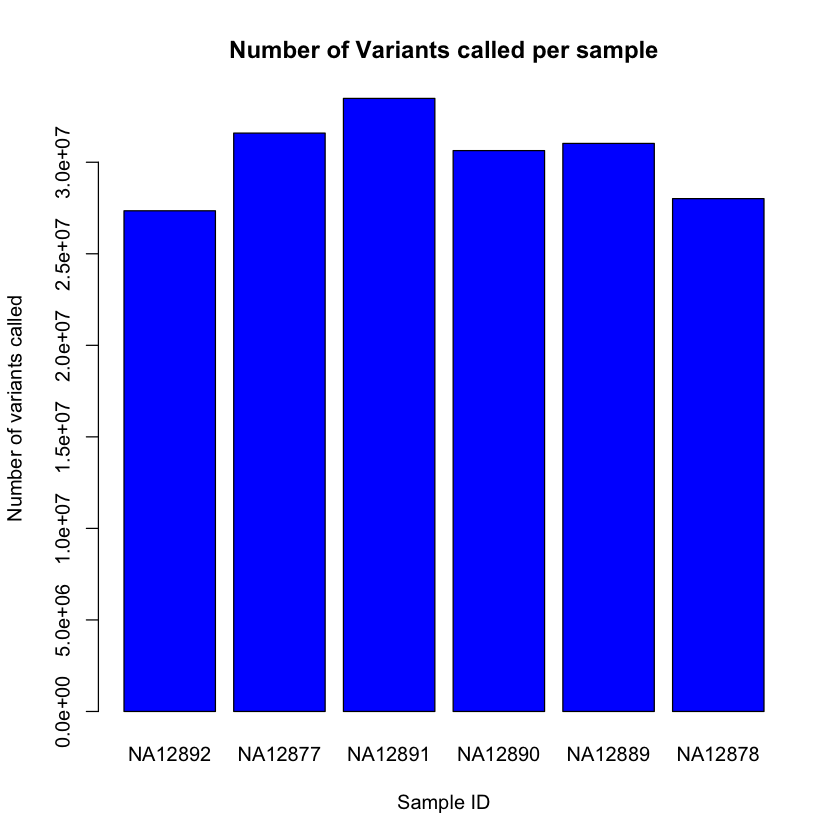

In [9]:
#Create barplot to show total number of variants called per sample 
barplot(variant_call$Number_of_variants_called_per_sample, col = "blue", 
        main = "Number of Variants called per sample",
        xlab = "Sample ID",
        ylab = "Number of variants called",
        names.arg = variant_call$Name)


### 2.5 : Number of variants, called per chromosome, per sample :<br>
The query computes the total number of variants called per chromosome, per sample in the platinum genomes dataset. The output table has three columns, *Name*, *Chromosome_number* and *Number_of_variants_called*

In [44]:
#Query to compute the number of variants present per chromosme, per sample  
per_chr_sql<-"SELECT Name,
CASE
    WHEN SAFE_CAST(REGEXP_REPLACE(reference_name, '^chr', '') AS INT64) < 10
    THEN CONCAT('0', REGEXP_REPLACE(reference_name, '^chr', ''))
    ELSE REGEXP_REPLACE(reference_name, '^chr', '')
END AS Chromosome_number,
COUNT(Name) AS Number_of_variants_called
FROM `platinum_genomes_deepvariant_variants_20180823`v, UNNEST (v.call) AS call
GROUP BY 1,2
ORDER BY 2"

per_chr<-dbGetQuery(gcp_account, per_chr_sql)
head(per_chr)

Name,Chromosome_number,Number_of_variants_called
<chr>,<chr>,<int>
NA12889,01,2194330
NA12892,01,2180206
NA12891,01,2318928
NA12890,01,2465160
NA12877,01,2178212
NA12878,01,2234041


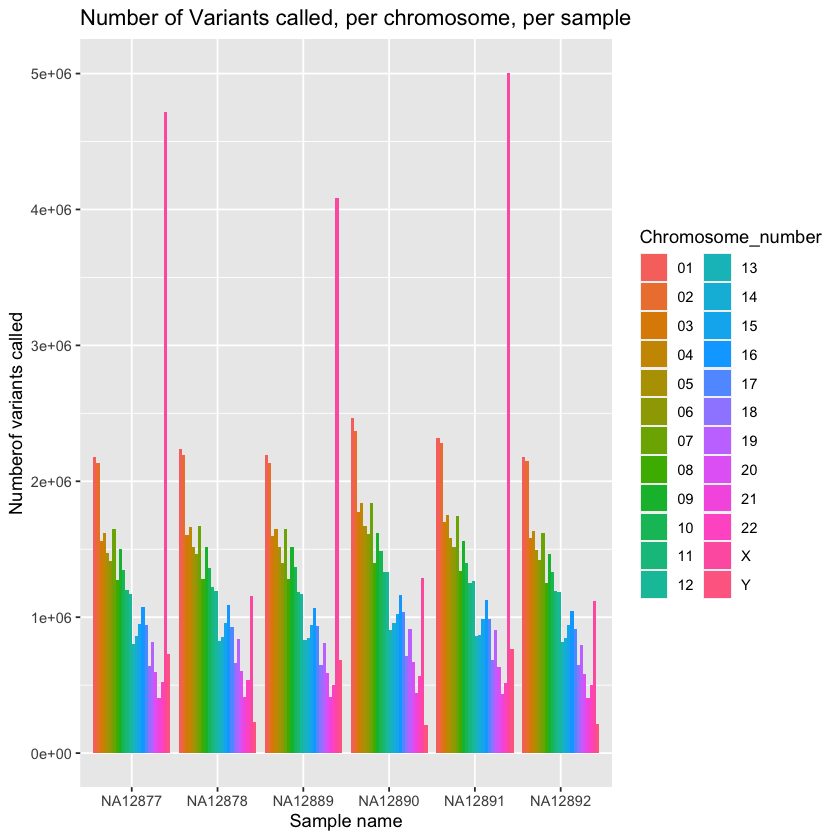

In [45]:
#Plotting dataframe
ggplot(per_chr, aes(x=Name,y=Number_of_variants_called))+ 
geom_bar(aes(fill=Chromosome_number),stat = 'identity', position = 'dodge')+
labs(title="Number of Variants called, per chromosome, per sample", x="Sample name", y="Numberof variants called")
